In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.figsize"] = (20,3)

In [2]:
confirmed_path = Path("../nvme/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_path = Path("../nvme/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_path = Path("../nvme/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

confirmed = pd.read_csv(confirmed_path)
deaths = pd.read_csv(deaths_path)
recovered = pd.read_csv(recovered_path)
languages = pd.read_csv("./data/languages.csv", index_col="code")

def clean_df(df):
    return df.rename(columns={
        "Country/Region": "country",
        "Province/State": "state",
        "Lat": "lat",
        "Long": "lon",
    })

confirmed = clean_df(confirmed)
deaths = clean_df(deaths)
recovered = clean_df(recovered)

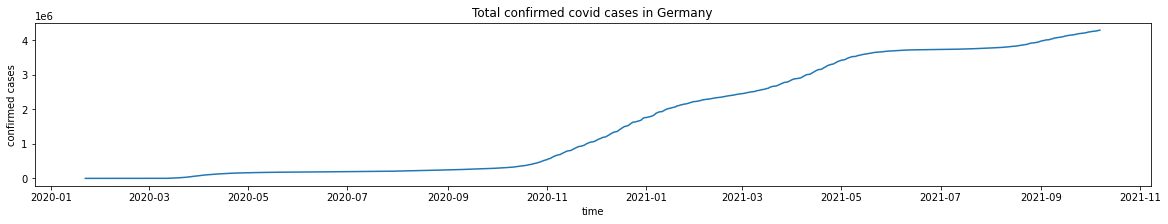

In [3]:
# plot the data for germany to get a feel
germany = confirmed.copy()
germany = germany[germany["country"] == "Germany"]
germany = germany.iloc[:,4:].T
germany.index = pd.to_datetime(germany.index)
plt.plot(germany)
plt.title("Total confirmed covid cases in Germany")
plt.xlabel("time")
plt.ylabel("confirmed cases")
plt.show()

In [4]:
# countries with covid data
pd.set_option('display.max_rows', None)
pprint(confirmed["country"].unique().tolist())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [5]:
# wikipedia language country codes we wish to map to
print(languages["name"])

code
ar                         Arabic
ary               Moroccan Arabic
arz               Egyptian Arabic
az                    Azerbaijani
azb             South Azerbaijani
bg                      Bulgarian
bs                        Bosnian
ca                        Catalan
cs                          Czech
da                         Danish
de                         German
el                          Greek
en                        English
es                        Spanish
et                       Estonian
fi                        Finnish
fr                         French
ga                          Irish
hi                          Hindi
he                         Hebrew
hu                      Hungarian
hy                       Armenian
hyw              Western Armenian
id                     Indonesian
is                      Icelandic
it                        Italian
ja                       Japanese
ko                         Korean
ku                        Kurdish
lb       

In [6]:
# map countries to wikipedia language codes
language_mapping = {
    # 'Afghanistan',
    'Albania': "sq",
    'Algeria': "ar", # arabic
    'Andorra': "ca", # catalan
    'Angola': "pt", # portugese
    'Antigua and Barbuda': "en",
    'Argentina': "es",
    'Armenia': "hy",
    'Australia': "en",
    'Austria': "de",
    'Azerbaijan': "az",
    'Bahamas': "en",
    'Bahrain': "ar",
    'Bangladesh': "bn", # bangla
    'Barbados': "en",
    'Belarus': "ru",
    'Belgium': "nl",
    'Belize': "en",
    'Benin': "fr", # more than 50 languages, but the official one is french
    # 'Bhutan', # 4 languages with 25% each, so no clear mapping possible
    'Bolivia': "en", # spanish is 60%
    'Bosnia and Herzegovina': "bs",
    'Botswana': 'tn', # Tswana, spoken by 77%
    'Brazil': "es",
    'Brunei': "ms", # Malay spoken by 290 million people
    'Bulgaria': "bg",
    # 'Burkina Faso', # Mossi, but cannot find it
    'Burma': "my", # burmese has only 33 million native speakers
    # 'Burundi',
    # 'Cabo Verde',
    'Cambodia': "km", # Khmer is only spoken by 16 million people
    'Cameroon': "fr", # french and english are official languages
    'Canada': "en",
    # 'Central African Republic',
    # 'Chad',
    'Chile': "es",
    'China': "zh",
    'Colombia': "es",
    # 'Comoros',
    # 'Congo (Brazzaville)',
    # 'Congo (Kinshasa)',
    'Costa Rica': "es",
    # "Cote d'Ivoire",
    'Croatia': "hr",
    'Cuba': "es",
    'Cyprus': "el",
    'Czechia': "cs",
    'Denmark': "da",
    # 'Diamond Princess',
    # 'Djibouti',
    # 'Dominica',
    'Dominican Republic': "es",
    'Ecuador': "es",
    'Egypt': "ar",
    # 'El Salvador',
    # 'Equatorial Guinea',
    # 'Eritrea',
    'Estonia': "et",
    # 'Eswatini',
    # 'Ethiopia',
    # 'Fiji',
    'Finland': "fi",
    'France': "fr",
    # 'Gabon', 
    # 'Gambia',
    # 'Georgia',
    'Germany': "de",
    # 'Ghana', # official is english but they also speak french and 14 other official languages
    'Greece': "el",
    # 'Grenada',
    'Guatemala': "es",
    # 'Guinea',
    # 'Guinea-Bissau',
    # 'Guyana',
    # 'Haiti',
    # 'Holy See',
    # 'Honduras',
    'Hungary': "hu",
    'Iceland': "is",
    'India': "hi", # Hindi has the largest number of speakers
    'Indonesia': "id",
    'Iran': "fa", # Persian
    'Iraq': "ar",
    'Ireland': "ga",
    'Israel': "he", # hebrew
    'Italy': "it",
    'Jamaica': "en",
    'Japan': "ja",
    'Jordan': "ar",
    # 'Kazakhstan', # Kazakh
    # 'Kenya',
    # 'Kiribati',
    'Korea, South': "ko",
    'Kosovo': "sq",
    # 'Kuwait',
    # 'Kyrgyzstan',
    # 'Laos',
    # 'Latvia',
    'Lebanon': "ar",
    # 'Lesotho',
    'Liberia': "en",
    'Libya': "ar",
    'Liechtenstein': "de",
    'Lithuania': "lt",
    'Luxembourg': "lb",
    # 'MS Zaandam',
    # 'Madagascar',
    # 'Malawi',
    'Malaysia': "ms", # Malay just as in Brunei
    # 'Maldives',
    # 'Mali',
    # 'Malta', too small with just 500 000?
    # 'Marshall Islands',
    'Mauritania': "ar",
    # 'Mauritius',
    'Mexico': "es",
    # 'Micronesia',
    'Moldova': "ro",
    'Monaco': "fr", # official language is french
    # 'Mongolia',
    # 'Montenegro',
    'Morocco': "ar",
    # 'Mozambique',
    # 'Namibia',
     #'Nepal',
    'Netherlands': "nl",
    'New Zealand': "en",
    # 'Nicaragua',
    # 'Niger',
    # 'Nigeria',
    # 'North Macedonia',
    'Norway': "no",
    # 'Oman',
    # 'Pakistan',
    # 'Palau',
    'Panama': "es",
    # 'Papua New Guinea',
    'Paraguay': "es",
    'Peru': "es",
    # 'Philippines',
    'Poland': "pl",
    'Portugal': "pt",
    'Qatar': "ar",
    'Romania': "ro",
    'Russia': "ru",
    # 'Rwanda',
    # 'Saint Kitts and Nevis',
    # 'Saint Lucia',
    # 'Saint Vincent and the Grenadines',
    # 'Samoa',
    # 'San Marino',
    # 'Sao Tome and Principe',
    'Saudi Arabia': "ar",
    # 'Senegal',
    'Serbia': "sr",
    # 'Seychelles',
    # 'Sierra Leone',
    # 'Singapore', # fragmented, 48.3% english, 30% mandarim, 10% malay
    'Slovakia': "sk",
    'Slovenia': "sl",
    # 'Solomon Islands',
    # 'Somalia',
    # 'South Africa',
    # 'South Sudan',
    'Spain': "es",
    # 'Sri Lanka',
    # 'Sudan',
    # 'Summer Olympics 2020',
    # 'Suriname',
    'Sweden': "sv",
    'Switzerland': "de",
    'Syria': "ar",
    'Taiwan*': "zh", # mandarin, which we map to chinese i guess
    # 'Tajikistan',
    # 'Tanzania',
    'Thailand': "th",
    # 'Timor-Leste',
    # 'Togo',
    # 'Trinidad and Tobago',
    'Tunisia': "ar",
    'Turkey': "tr",
    'US': "en",
    # 'Uganda',
    'Ukraine': "uk",
    'United Arab Emirates': "ar",
    'United Kingdom': "en",
    'Uruguay': "es",
    # 'Uzbekistan',
    # 'Vanuatu',
    # 'Venezuela',
    'Vietnam': "vi",
    # 'West Bank and Gaza',
    # 'Yemen',
    # 'Zambia',
    # 'Zimbabwe',
}

In [7]:
# show which and how many countries will be dropped
all_countries = confirmed["country"].unique().tolist()
excluded_countries = sorted(
    list(set(all_countries) - set(language_mapping.keys()))
)
print(f"excluded countries: ({len(excluded_countries)} from {len(all_countries)})")
pprint(excluded_countries)

excluded countries: (94 from 195)
['Afghanistan',
 'Bhutan',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lesotho',
 'MS Zaandam',
 'Madagascar',
 'Malawi',
 'Maldives',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Mauritius',
 'Micronesia',
 'Mongolia',
 'Montenegro',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'North Macedonia',
 'Oman',
 'Pakistan',
 'Palau',
 'Papua New Guinea',
 'Philippines',
 'Rwanda',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Mari

In [8]:
# group countries and combine their provinces and states
# add the mapped wikipedia domain code to the tables
def group_and_map_country(df):
    def combine(group):
        group = group.iloc[:,1:] # drop state
        group.iloc[0,3:] = group.iloc[:,3:].agg("sum") # sum the covid numbers
        group.iloc[0,1:3] = group.iloc[:,1:3].agg("mean") # mean of lat and lon
        group = group.iloc[0,:]
        return group
    
    df = df.groupby("country").apply(combine) # combine states of the same country
    df.insert(1, "country_code", np.nan) # insert new country_code column after the country
    df["country_code"] = df["country"].apply(lambda c: language_mapping.get(c)) # map wikipedia language
    df = df[df["country_code"].notna()] # filter countries with no mapped wikipedia language
    df = df.T # transpose table
    df.iloc[4:,:].index = pd.to_datetime(df.iloc[4:,:].index) # convert index to datetimes
    df = df.T # transpose table
    return df

mapped_confirmed = group_and_map_country(confirmed.copy())
mapped_deaths = group_and_map_country(deaths.copy())
mapped_recovered = group_and_map_country(recovered.copy())

In [9]:
mapped_confirmed.head()

,country,country_code,lat,lon,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21
country,,,,,,,,,,,,,,,,,,,,,
Albania,Albania,sq,41.1533,20.1683,0,0,0,0,0,0,...,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723
Algeria,Algeria,ar,28.0339,1.6596,0,0,0,0,0,0,...,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276
Andorra,Andorra,ca,42.5063,1.5218,0,0,0,0,0,0,...,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288
Angola,Angola,pt,-11.2027,17.8739,0,0,0,0,0,0,...,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803
Antigua and Barbuda,Antigua and Barbuda,en,17.0608,-61.7964,0,0,0,0,0,0,...,3160,3188,3231,3336,3403,3503,3503,3518,3581,3663


In [10]:
# check that the results are sane
print("\n confirmed cases for China before:")
print(confirmed[confirmed["country"] == "China"].iloc[:,:6])

print("\n confirmed cases for China after:")
print(mapped_confirmed[mapped_confirmed["country"] == "China"].iloc[:,:6])

print("\n mapped language code for china:")
print(mapped_confirmed[mapped_confirmed["country"] == "China"]["country_code"].head())


 confirmed cases for China before:
             state country      lat       lon  1/22/20  1/23/20
58           Anhui   China  31.8257  117.2264        1        9
59         Beijing   China  40.1824  116.4142       14       22
60       Chongqing   China  30.0572  107.8740        6        9
61          Fujian   China  26.0789  117.9874        1        5
62           Gansu   China  35.7518  104.2861        0        2
63       Guangdong   China  23.3417  113.4244       26       32
64         Guangxi   China  23.8298  108.7881        2        5
65         Guizhou   China  26.8154  106.8748        1        3
66          Hainan   China  19.1959  109.7453        4        5
67           Hebei   China  39.5490  116.1306        1        1
68    Heilongjiang   China  47.8620  127.7615        0        2
69           Henan   China  37.8957  114.9042        5        5
70       Hong Kong   China  22.3000  114.2000        0        2
71           Hubei   China  30.9756  112.2707      444      444
72  

In [14]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, LongType, IntegerType
import pyspark.sql.functions as F

MAX_MEMORY = "60G"

spark = SparkSession \
    .builder \
    .appName("CSSEGISandData-COVID-19") \
    .config("spark.executor.memory", MAX_MEMORY) \
    .config("spark.driver.memory", MAX_MEMORY) \
    .config('spark.driver.maxResultSize', MAX_MEMORY) \
    .config('spark.ui.showConsoleProgress', 'false') \
    .getOrCreate()
sc = spark.sparkContext

21/10/10 22:33:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/10/10 22:33:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
21/10/10 22:33:03 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
21/10/10 22:33:03 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [15]:
# write the covid data to parquet
def write_to_parquet(df, output_path: str):
    spark_df = spark.createDataFrame(df)
    spark_df = spark_df.repartition(F.col("country_code"))
    output_path.parent.mkdir(parents=True, exist_ok=True)
    spark_df.write.format("parquet").partitionBy("country_code").mode("overwrite").save(str(output_path))
    print(f"wrote {output_path}")
    
confirmed_parquet_path = confirmed_path.with_suffix(".parquet")
deaths_parquet_path = deaths_path.with_suffix(".parquet")
recovered_parquet_path = recovered_path.with_suffix(".parquet")
    
write_to_parquet(mapped_confirmed, confirmed_parquet_path)
write_to_parquet(mapped_deaths, deaths_parquet_path)
write_to_parquet(mapped_recovered, recovered_parquet_path)

21/10/10 22:33:43 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


wrote ../nvme/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.parquet
wrote ../nvme/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.parquet
wrote ../nvme/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.parquet


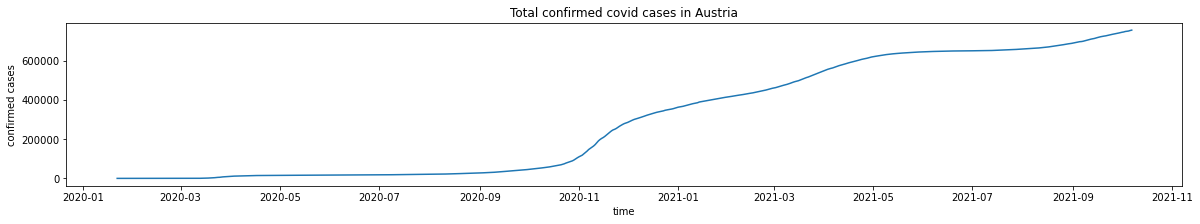

In [22]:
# read a parquet file back to check
reader = spark.read.option("basePath", str(confirmed_parquet_path))
german_parquet = reader.parquet(str(confirmed_parquet_path / "country_code=de"))
german_parquet = german_parquet.toPandas()
austria = german_parquet[german_parquet["country"] == "Austria"].iloc[:,3:-1].T
austria.index = pd.to_datetime(austria.index)
plt.plot(austria)
plt.title("Total confirmed covid cases in Austria")
plt.xlabel("time")
plt.ylabel("confirmed cases")
plt.show()